In [2]:
from sklearn.datasets import fetch_mldata
import numpy as np
import os
import pandas as pd
from math import sqrt

mnist = fetch_mldata('MNIST original', data_home="data")

In [3]:
print(mnist.data.shape)
nr_pix = int(sqrt(mnist.data.shape[1]))
print("There are {0} samples and each sample (image) is {1}x{2} pixels".format(mnist.data.shape[0], nr_pix, nr_pix))

(70000, 784)
There are 70000 samples and each sample (image) is 28x28 pixels


In [4]:
# because we have 70000 samples, there are also 70000 targets
mnist.target.shape

(70000,)

In [5]:
# This means that the digits that your model will need to recognize are numbers from 0 to 9.
np.unique(mnist.target)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [6]:
print(mnist.DESCR)
print(mnist.keys())
print(mnist.COL_NAMES)

mldata.org dataset: mnist-original
dict_keys(['DESCR', 'COL_NAMES', 'target', 'data'])
['label', 'data']


In [7]:
os.listdir(os.path.join("data", 'mldata'))

['mnist-original.mat']

In [9]:
cols = []
for i in range(1, 785):
    cols.append("pixel_" + str(i))
df = pd.DataFrame(data = np.c_[mnist.target, mnist.data],
                  columns = ['Target'] + cols)

In [10]:
df.head(5)

,Target,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,pixel_784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.iloc[:,300].max()

255.0

In [12]:
pairs = df.isnull().sum()
missing = 0
for i in range(785):
    if pairs[i] != 0:
        print("Missing values - col {0}".format(i))
        missing = 1
        break
if missing == 0:
    print("No missing values")

No missing values


Plotting an image



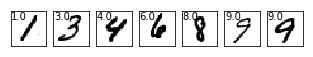

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

mnist_images = mnist.data.reshape(70000, 28, 28)
print("Plotting an image\n")
fig = plt.figure(figsize=(6, 6))

for i in range(1, 8):
    ax = fig.add_subplot(1, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(mnist_images[10000 * i - 1], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(mnist.target[10000 * i - 1]))

# Show the plot
plt.show()

In [14]:
df['Target'].describe()

count    70000.000000
mean         4.452429
std          2.890195
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: Target, dtype: float64

In [15]:
df.loc[(df["Target"]==9)]
df.loc[(df["Target"]==9)]["pixel_700"].describe()

count    6958.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: pixel_700, dtype: float64

In [16]:
from sklearn import preprocessing

X = np.array(df.iloc[:, 1:].values)
y = np.array(df.iloc[:, 0].values)
m = y.size

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
X = min_max_scaler.fit_transform(X)

In [23]:
zeros = np.where(y == 0)
ones = np.where(y == 1)
twos = np.where(y == 2)
threes = np.where(y == 3)
fours = np.where(y == 4)
fives = np.where(y == 5)
print(fives)
sixes = np.where(y == 6)
sevens = np.where(y == 7)
eights = np.where(y == 8)
nines = np.where(y == 9)

(array([30596, 30597, 30598, ..., 66028, 66029, 66030]),)


In [222]:
XX = X[fives[0], :]
print(XX)
extendedX = np.c_[np.ones(m), X]
lastY = y[fives[0]]
initial_theta = np.zeros(extendedX.shape[1])

np.transpose(np.nonzero(XX))

first = XX[0]

[[-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]
 ..., 
 [-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]
 [-1. -1. -1. ..., -1. -1. -1.]]


In [224]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

In [226]:
def cost_function(X, y, theta):
    m = y.size
    h = sigmoid(np.dot(X, theta))
    return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h)))

In [228]:
def sgd(X, y, initial_theta, learningRate, n_epochs, batchSz):
    theta = initial_theta
    
    for epoch in range(n_epochs):
        for i in np.arange(0, X.shape[0], batchSz):
            newX = X[i:i+batchSz, :]
            newY = y[i:i+batchSz]
            
            predicted = sigmoid(np.dot(newX, theta))
            error = predicted - newY
            gradient = newX.T.dot(error) / newX.shape[0]
            
            theta -= learningRate * gradient
    
    return theta

In [262]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(extendedX, y, test_size = 0.2, random_state = 11)

In [263]:
all_theta = np.zeros((10, X_train.shape[1]))

In [269]:
i = 0
for target in np.unique(mnist.target):
    tmp_y = np.array(y_train == target, dtype=int)
    all_theta[i] = sgd(X_train, tmp_y, initial_theta, 0.001, 10, 10)
    i = i+1

In [270]:
#Predictions
P = sigmoid(X_test.dot(all_theta.T))

In [271]:
p = [np.unique(mnist.target)[np.argmax(P[i, :])] for i in range(X_test.shape[0])]

In [272]:
correct = 0
wrong = 0
for i in range (X_test.shape[0]):
    res = int(y_test[i]) - np.argmax(P[i, :])
    if res == 0:
        correct = correct + 1
    else:
        wrong = wrong + 1
print("Correct = {0}; Wrong = {1}".format(correct, wrong))

Correct = 12621; Wrong = 1379


In [273]:
from sklearn.metrics import accuracy_score  
print("Test Accuracy ", accuracy_score(y_test, p) * 100 , '%')

Test Accuracy  90.15 %
